In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential

In [120]:
df = pd.read_csv("Q4_Dataset/CarPrice_Assignment.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [121]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [122]:
df['CompanyName'] = df['CarName'].apply(lambda X:X.split(' ')[0])
df = df.drop(['CarName','symboling','car_ID'], axis = 1)


In [123]:
print(df['CompanyName'].unique())

df = df.replace('alfa-romero','alfa-romeo')
df = df.replace('maxda','mazda')
df = df.replace('Nissan','nissan')
df = df.replace('porcshce','porsche')
df = df.replace('toyouta','toyota')
df = df.replace('vokswagen','volkswagen')
df = df.replace('vw','volkswagen')


print(df['CompanyName'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [124]:
df = pd.get_dummies(df)
df

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,0,0,1
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,0,0,0,0,1
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,0,0,0,0,0,0,1
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,0,0,0,0,1


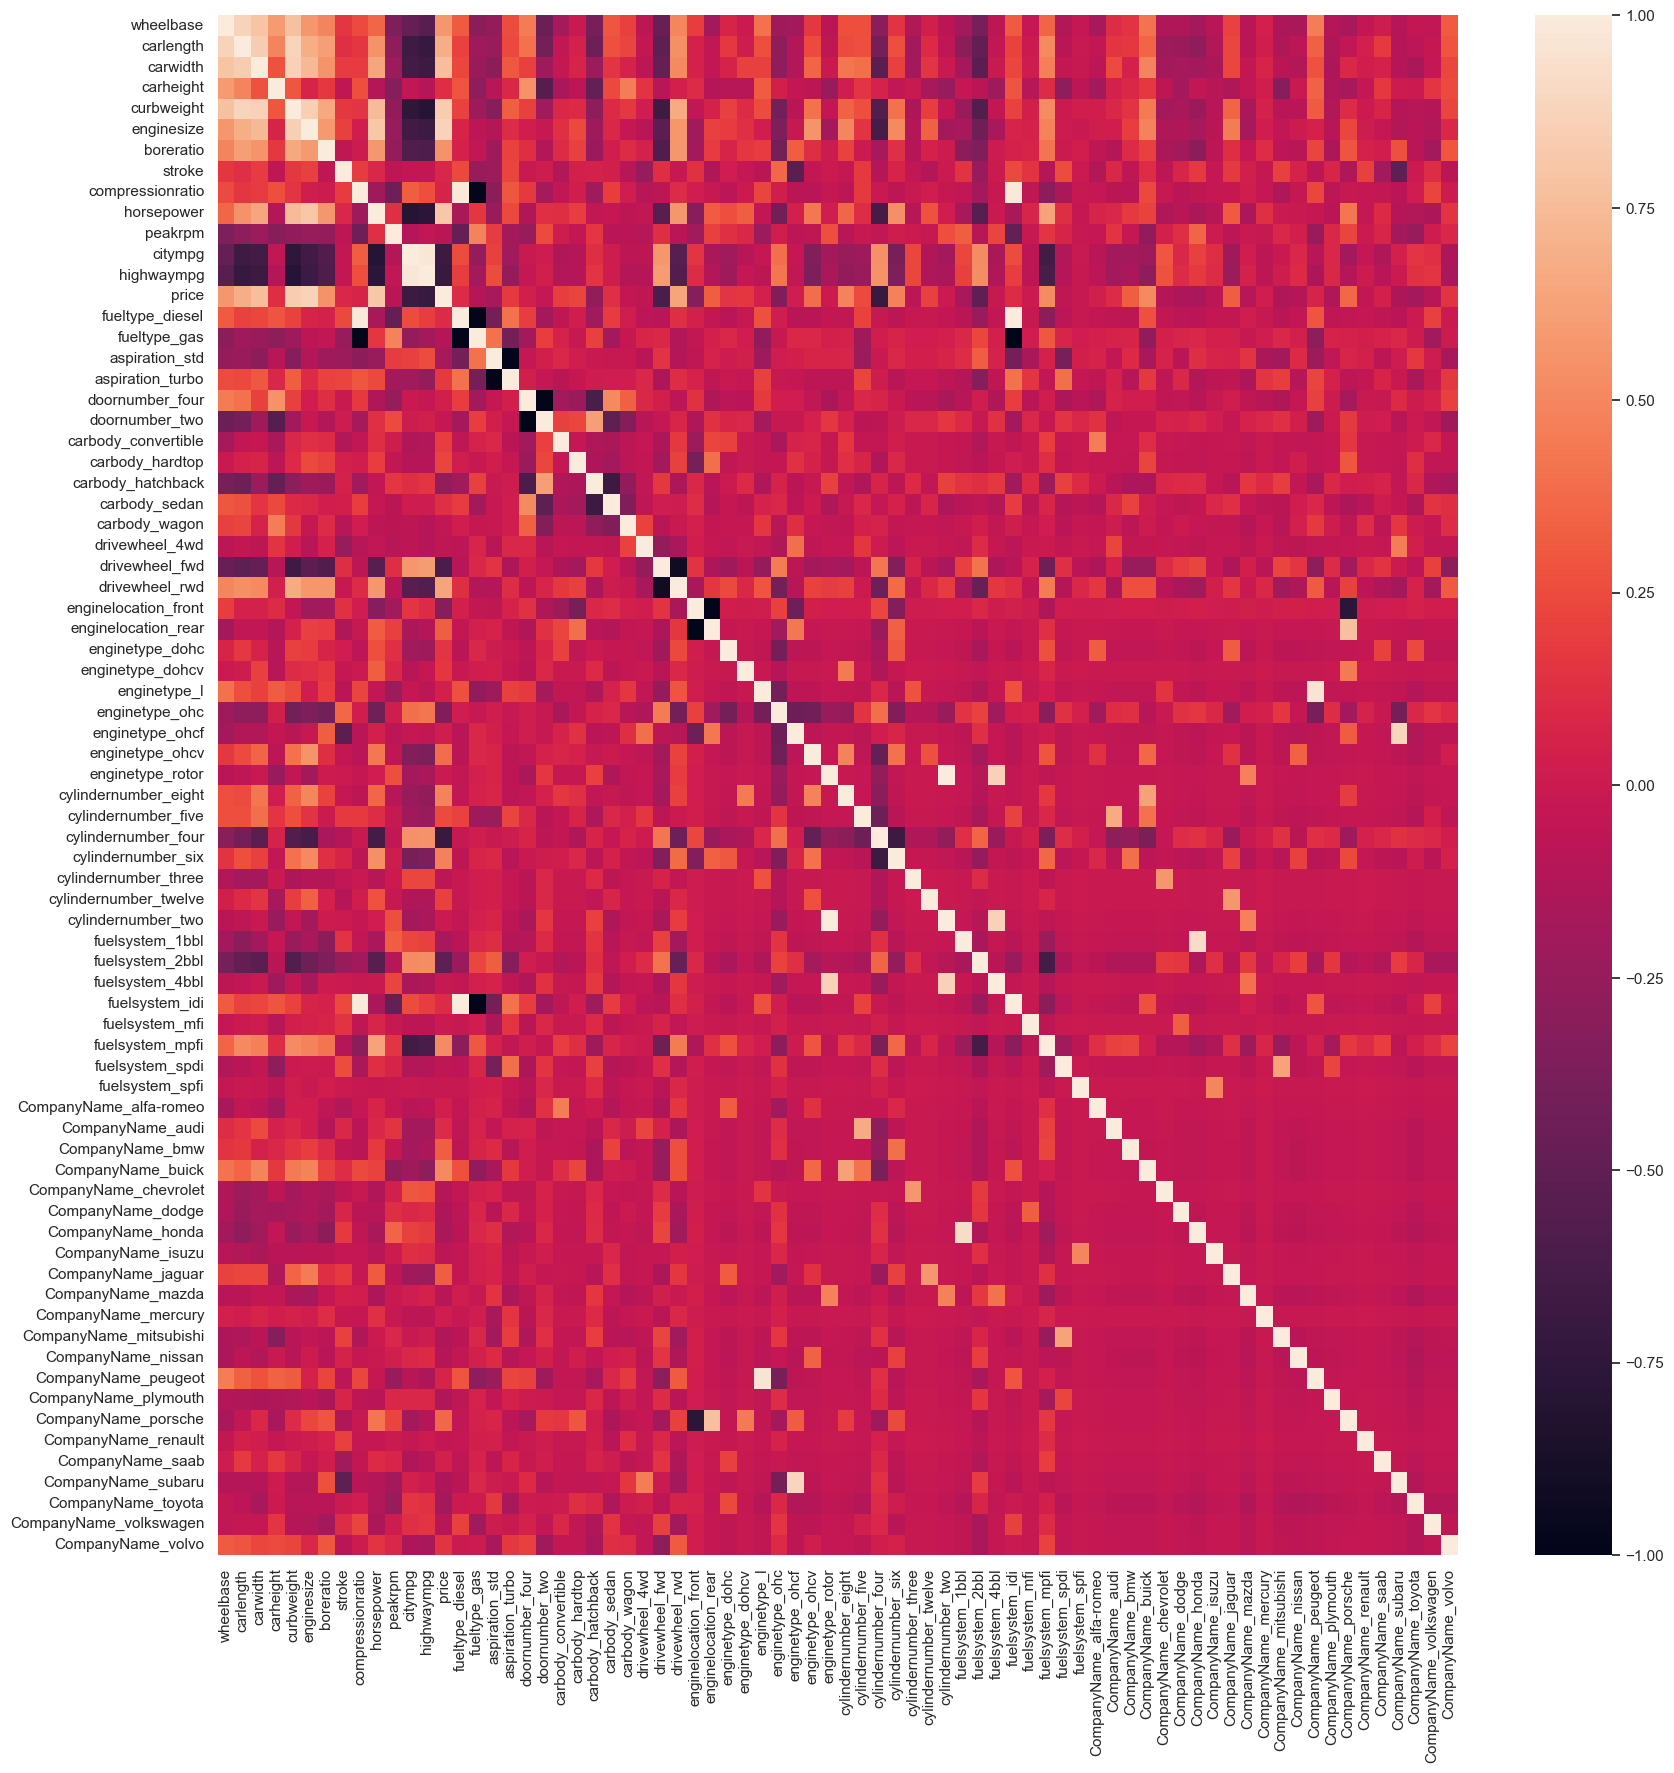

In [125]:

mat = df.corr()
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(mat)
plt.show()

In [126]:
price_corr = np.abs(mat['price'].drop('price'))
most_corr_name = price_corr.keys()[np.argmax(price_corr)]
most_corr_val = price_corr.max()
print(most_corr_name, most_corr_val)

enginesize 0.8741448025245117


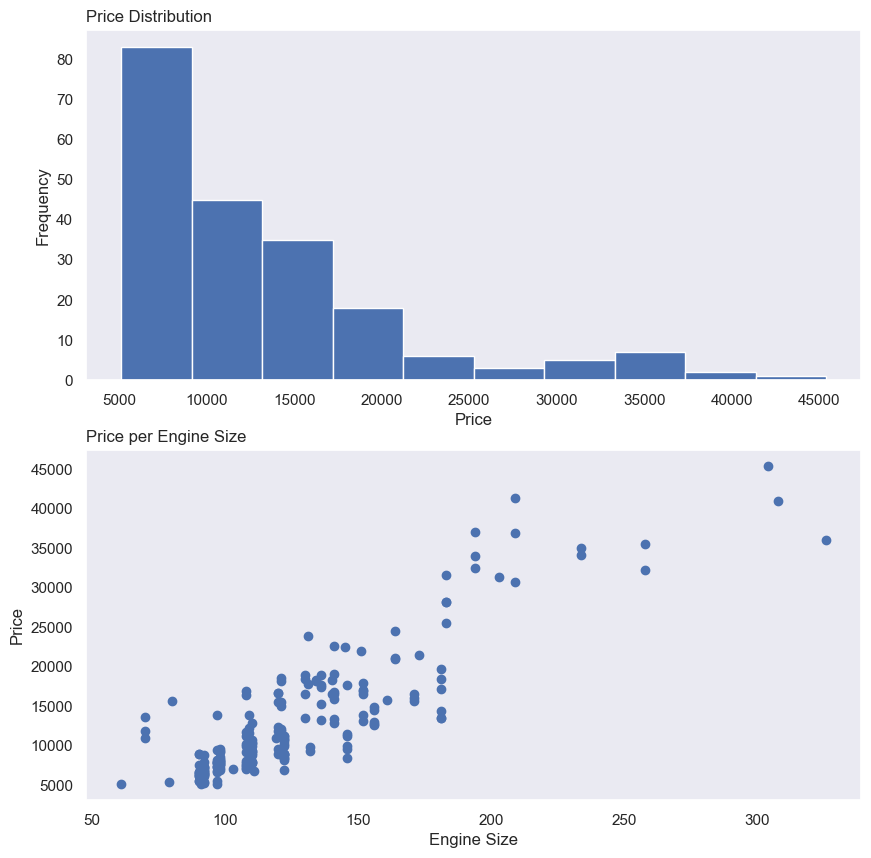

In [127]:
fig , axs = plt.subplots(2,1)
fig.set_size_inches(10,10)

axs[0].hist(df['price'])
axs[0].set_title('Price Distribution', loc='left')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')
axs[0].grid(False)

axs[1].scatter(df['enginesize'],df['price'])
axs[1].set_title('Price per Engine Size', loc='left')
axs[1].set_xlabel('Engine Size')
axs[1].set_ylabel('Price')
axs[1].grid(False)

plt.show()


In [131]:
x = df.drop('price', axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [ ]:
scaler = MinMaxScaler
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)